# Computation of the CTA sensitivity

## Introduction

This notebook explains how to derive the CTA sensitivity for a point-like IRF at a fixed zenith angle and fixed offset. The significativity is computed for the 1D analysis (On-OFF regions) and the LiMa formula.

We will be using the following Gammapy classes:

* [gammapy.irf.CTAIrf](http://docs.gammapy.org/dev/api/gammapy.irf.CTAIrf.html)
* [gammapy.spectrum.SensitivityEstimator](http://docs.gammapy.org/dev/api/gammapy.spectrum.SensitivityEstimator.html)

## Setup
As usual, we'll start with some setup ...

In [1]:
%matplotlib inline

In [2]:
from gammapy.irf import CTAPerf
from gammapy.spectrum import SensitivityEstimator

## Load IRFs

First import the CTA IRFs

In [3]:
filename = '$GAMMAPY_EXTRA/datasets/cta/perf_prod2/point_like_non_smoothed/South_5h.fits.gz'
irf = CTAPerf.read(filename)

/Users/deil/software/anaconda3/envs/gammapy-dev/lib/python3.6/site-packages/astropy/units/quantity.py:639: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


## Compute sensitivity

Choose a few parameters, then run the sentitivity computation.

In [4]:
sens = SensitivityEstimator(
    irf=irf,
    livetime='5h',
)
sens.run()

## Print and plot the results

In [5]:
sens.print_results()

   ENERGY            FLUX         
    TeV         erg / (cm2 s)     
----------- ----------------------
0.015848933  1.265689381204479e-10
0.025118865 2.4123499127545202e-11
0.039810717  1.591399267815591e-11
 0.06309573  4.267142041868311e-12
        0.1 3.0445372299444074e-12
 0.15848933  1.553676402532959e-12
 0.25118864 1.0770960555265993e-12
 0.39810714  7.832358940563628e-13
  0.6309573  5.938073879545129e-13
        1.0 4.2875940141105596e-13
  1.5848932 3.6285184450653055e-13
  2.5118864  3.212565097862236e-13
  3.9810715  3.391524766517475e-13
   6.309573  3.951098391300483e-13
       10.0  5.184815854344552e-13
  15.848931  8.365662980458095e-13
  25.118862 1.2677100480242012e-12
   39.81071 2.0089332372979073e-12
  63.095726 3.2424648871487123e-12
   99.99999  5.102125664442202e-12
   158.4893  9.048305001092968e-12


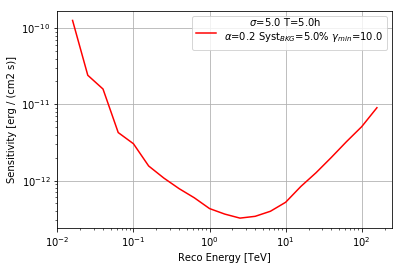

In [6]:
sens.plot()

In [7]:
# This will give you the results as an Astropy table,
# which you can save to FITS or CSV or use for further analysis
sens.diff_sensi_table

ENERGY,FLUX
TeV,erg / (cm2 s)
float32,float64
0.015848933,1.265689381204479e-10
0.025118865,2.4123499127545202e-11
0.039810717,1.591399267815591e-11
0.06309573,4.267142041868311e-12
0.1,3.0445372299444074e-12
0.15848933,1.553676402532959e-12
0.25118864,1.0770960555265993e-12
0.39810714,7.832358940563628e-13


## Exercises

* Also compute the sensitivity for a 20 hour observation
* Compare how the sensitivity differs between 5 and 20 hours by plotting the ratio as a function of energy.